In [26]:
import numpy as np
from datetime import datetime, date, timedelta
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
class bonds:
        
    def __init__(self,
                 N : np.float,
                 tf : np.float,
                 tr : np.float,
                 d_emis : np.str,
                 d_jouis : np.str,
                 d_ech : np.str,
                 d_val : np.str):  
    
        self.N = N
        self.tf = tf
        self.tr = tr
        self.d_emis = datetime.strptime(d_emis, '%d/%m/%Y').date()
        self.d_jouis = datetime.strptime(d_jouis, '%d/%m/%Y').date()
        self.d_ech = datetime.strptime(d_ech, '%d/%m/%Y').date()
        self.d_val = datetime.strptime(d_val, '%d/%m/%Y').date()
           
        "sortie"
        
        self.dirty_price = self.calculator(N,tf,tr,d_emis,d_jouis,d_ech,d_val)[0]
        self.coupon_couru = self.calculator(N,tf,tr,d_emis,d_jouis,d_ech,d_val)[1]
        self.clean_price = self.calculator(N,tf,tr,d_emis,d_jouis,d_ech,d_val)[2]
        self.coupon_recu = self.calculator(N,tf,tr,d_emis,d_jouis,d_ech,d_val)[3]
        self.duration = self.calculator(N,tf,tr,d_emis,d_jouis,d_ech,d_val)[4]
        self.sensibilite = self.calculator(N,tf,tr,d_emis,d_jouis,d_ech,d_val)[5]
        self.convexite = self.calculator(N,tf,tr,d_emis,d_jouis,d_ech,d_val)[6]
    
    def calculator(self,N,tf,tr,d_emis,d_jouis,d_ech,d_val): #7 parametres dont 4 dates
        
        "calcul intermediaire"
        
        # maturite residuelle et initiale
        self.mr = (self.d_ech - self.d_val).days
        self.mi = (self.d_ech - self.d_emis).days
        
        # date du dernier coupon (ddc) et date du prochain coupon (dpc)
        ddc = self.d_jouis
        dpc = ddc.replace(year = ddc.year+1)
        while dpc < self.d_val:
            dpc = dpc.replace(year= dpc.year +1)
        self.ddc = dpc.replace(year = dpc.year-1)
        self.dpc = dpc
        
        # Nombre de jours exact de l’année écoulée ???????
        self.A = 365
        
        # nombre de jours entre date de valorisation et date du prochain coupon 
        self.nj = (self.dpc - self.d_val).days 
        
        # nombre de coupon restant avant la maturité
        self.n = (self.d_ech.year - self.dpc.year) + 1
        
        # nombre de coupon deja recu avant la date de valorisation
        self.nc = (self.ddc.year - self.d_jouis.year) + 1
        
        # Date du premier coupon ??
        # d_pc = "date_jouissnce+ frequence"???

        if self.mi <= 365 : #maturite initiale inferieure a 1an

            C = N * tf * self.mi / 360
            Cr = C*self.nc
            P = (N + C) / (1+ tr*self.mr /360)
            Cc = N*tf* (self.mi-self.mr) / 360
            
            
            # Duration et sensiblite
            num = 0
            D = 0
            for i in range(1,self.n+1):
                num = num + (self.nj/self.A + i-1)*C
            num = num + (self.nj/self.A + self.n-1) * N
            D = num/ P
            S = D/(1+self.tr)
                    
            # Convexite
            Co = 0
            for i in range(1,self.n+1):
                num = num + C*(self.nj/self.A + i-1)* (self.nj/self.A + i) / (1+self.tr)**(self.nj/self.A + i-1)
            num = num + N * (self.nj/self.A + self.n-1)* (self.nj/self.A + self.n) / (1+self.tr)**(self.nj/self.A + self.n-1)
            Co = num/ (P*(1+self.tr)**2)              

        else:  #maturite initiale superieure a 1an

            if self.mr <= 365: #maturite residuelle inferieure a 1an

                    C = N*tf 
                    Cr = C*self.nc
                    P = (N + C) / (1+ tr*self.mr/360)
                    Cc = N*tf* (self.d_val-self.ddc).days / self.A
                    
                    # Duration et sensiblite
                    num = 0
                    D = 0
                    for i in range(1,self.n+1):
                        num = num + (self.nj/self.A + i-1)*C
                    num = num + (self.nj/self.A + self.n-1) * N
                    D = num/ P
                    S = D/(1+self.tr)
                    
                    # Convexite
                    Co = 0
                    for i in range(1,self.n+1):
                        num = num + C*(self.nj/self.A + i-1)* (self.nj/self.A + i) / (1+self.tr)**(self.nj/self.A + i-1)
                    num = num + N * (self.nj/self.A + self.n-1)* (self.nj/self.A + self.n) / (1+self.tr)**(self.nj/self.A + self.n-1)
                    Co = num/ (P*(1+self.tr)**2)

            else: # maturite residuelle superieure a 1an

                    C = N*tf
                    Cr = C*self.nc
                    Cc = N*tf* (self.d_val-self.ddc).days / self.A
                    s = 0
                    for i in range(1,self.n+1): # n compris
                        s = s + C/ (1+tr)**(i-1)
                    P = ( s + N/ (1+tr)**(self.n-1))  / (1+tr)**(self.nj / self.A)
                    
                    # Duration et sensiblite
                    num = 0
                    D = 0
                    for i in range(1,self.n+1):
                        num = num + C *( self.nj/self.A + i-1)
                    num = num + N*( self.nj/self.A + self.n-1)
                    D = num/ P
                    S = D/(1+self.tr)
                    
                    # Convexite
                    Co = 0
                    for i in range(1,self.n+1):
                        num = num + C*(self.nj/self.A + i-1)* (self.nj/self.A + i) / (1+self.tr)**(self.nj/self.A + i-1)
                    num = num + N * (self.nj/self.A + self.n-1)* (self.nj/self.A + self.n) / (1+self.tr)**(self.nj/self.A + self.n-1)
                    Co = num/ (P*(1+self.tr)**2)

                        
        return  (round(P),round(Cc),round(P-Cc),round(Cr), round(D,2), round(S,2), round(Co,2))
    

In [28]:
def attribution(N,tf,tr1,tr2,d_emis,d_jouis,d_ech,d_val1,d_val2,spread1,spread2,shift):
    
    coupon_recu1 = bonds(N,tf,tr1,d_emis,d_jouis,d_ech,d_val1).coupon_recu
    coupon_recu2 = bonds(N,tf,tr2,d_emis,d_jouis,d_ech,d_val2).coupon_recu
    coupon_couru1 = bonds(N,tf,tr1,d_emis,d_jouis,d_ech,d_val1).coupon_couru
    coupon_couru2 = bonds(N,tf,tr2,d_emis,d_jouis,d_ech,d_val2).coupon_couru
    dirty_price1 = bonds(N,tf,tr1,d_emis,d_jouis,d_ech,d_val1).dirty_price
    dirty_price2 = bonds(N,tf,tr2,d_emis,d_jouis,d_ech,d_val2).dirty_price
    
    clean_price1 = bonds(N,tf,tr1+spread1,d_emis,d_jouis,d_ech,d_val1).clean_price
    clean_price2 = bonds(N,tf,tr1+spread1,d_emis,d_jouis,d_ech,d_val2).clean_price
    clean_price3 = bonds(N,tf,tr1+spread1+shift,d_emis,d_jouis,d_ech,d_val2).clean_price
    clean_price4 = bonds(N,tf,tr2+spread1,d_emis,d_jouis,d_ech,d_val2).clean_price
    clean_price5 = bonds(N,tf,tr2+spread2,d_emis,d_jouis,d_ech,d_val2).clean_price
    coupon_recu = coupon_recu2 - coupon_recu1
        
    performance = ( dirty_price2 - dirty_price1 + coupon_recu ) / dirty_price1
    effet_coupon = (coupon_couru2 + coupon_recu - coupon_couru1) / dirty_price1
    effet_amortissement = (clean_price2 - clean_price1) / dirty_price1
    effet_niveau = (clean_price3 - clean_price2) / dirty_price1
    effet_courbe = (clean_price4 - clean_price3) / dirty_price1
    effet_spread = (clean_price5 - clean_price4) / dirty_price1
    effet_total = effet_coupon + effet_amortissement + effet_niveau + effet_courbe + effet_spread
    
    return (performance,effet_coupon,effet_amortissement,effet_niveau,effet_courbe,effet_spread)

    """
    print ("Effet coupon =", effet_coupon)
    print("Effet amortissement =", effet_amortissement)
    print("Effet niveau =", effet_niveau)
    print("Effet courbe =", effet_courbe)
    print("Effet spread =", effet_spread)
    print("Effet total =", effet_total)
    print ("performance =", performance)
    """

## Example

In [29]:
N = 100000
tf = 0.039
tr1 = 0.02463
tr2 = 0.0345
d_emis = "21/10/2014"
d_jouis = "21/10/2014"
d_ech = "21/10/2021"
d_val1 = "05/05/2017"
d_val2 = "05/05/2028"
spread1 = 0
spread2 = 0
shift = 0.002
# tr1 correspond au taux de rendement de la courbe ZC à la date de valorisation d_val1
# tr2 correspond au taux de rendement de la courbe ZC à la date de valorisation d_val1

attribution(N,tf,tr1,tr2,d_emis,d_jouis,d_ech,d_val1,d_val2,spread1,spread2,shift)

(0.6434505856447643,
 0.3970079381233462,
 0.14889069814777123,
 0.01851303591584479,
 0.07903891345780212,
 0.0)

## Real Data

In [30]:
import os
os.getcwd()
os.chdir("C:\\Users\\Halem\\Downloads\\final")

In [31]:
#pd.set_option("display.max_row",5)
#pd.set_option("display.max_column",6)
bond = pd.read_excel("ptfbonds.xlsx") 

In [32]:
data = pd.DataFrame( {'Short Name' : bond['Short Name'], 'Performance' : None, 
                      'Effet coupon' : None ,'Effet amortissement' : None,
                      'Effet niveau' : None , 'Effet courbe' : None, 'Effet taux' : None,
                      'Effet spread' : None  } )

In [33]:
for i in range (44): 
    
    N = 100000
    tf = bond['Cpn Rate'][i]/100
    tr1 = bond['Yield Mat'][i]/100
    tr2 = bond['YTM'][i]/100
    d_emis = bond['Date emission'][i].strftime("%d/%m/%Y")
    d_jouis = bond['Jouissance'][i].strftime("%d/%m/%Y")
    d_ech = bond['Mat. Date'][i].strftime("%d/%m/%Y")
    d_val1 = "08/06/2021"
    d_val2 = "09/06/2021"
    spread1 = 0
    spread2 = 0
    shift = 0.002

    data['Performance'][i] = 100*attribution(N,tf,tr1,tr2,d_emis,d_jouis,d_ech,d_val1,d_val2,spread1,spread2,shift)[0]
    data['Effet coupon'][i] = 100*attribution(N,tf,tr1,tr2,d_emis,d_jouis,d_ech,d_val1,d_val2,spread1,spread2,shift)[1]
    data['Effet amortissement'][i] = 100*attribution(N,tf,tr1,tr2,d_emis,d_jouis,d_ech,d_val1,d_val2,spread1,spread2,shift)[2]
    data['Effet niveau'][i] = 100*attribution(N,tf,tr1,tr2,d_emis,d_jouis,d_ech,d_val1,d_val2,spread1,spread2,shift)[3]
    data['Effet courbe'][i] = 100*attribution(N,tf,tr1,tr2,d_emis,d_jouis,d_ech,d_val1,d_val2,spread1,spread2,shift)[4]
    data['Effet spread'][i] = 100*attribution(N,tf,tr1,tr2,d_emis,d_jouis,d_ech,d_val1,d_val2,spread1,spread2,shift)[5]
    #data['Effet total'][i] = data['Effet coupon'][i] + data['Effet amortissement'][i] + data['Effet niveau'][i] + data['Effet courbe'][i] 
    data['Effet taux'][i] = data['Effet niveau'][i] + data['Effet courbe'][i] 


In [35]:
data = data.iloc[0:44,:]
data.head()

,Short Name,Performance,Effet coupon,Effet amortissement,Effet niveau,Effet courbe,Effet taux,Effet spread
0,MA0002007096,0.00885724,0.0141716,-0.00974296,-0.521691,0.52612,0.00442862,0
1,MA0002007641,0.00911721,0.0132614,-0.00828837,-0.749269,0.753413,0.00414418,0
2,MA0002008128,0.0185124,0.00974336,-0.00584602,-0.13251,0.147125,0.014615,0
3,MA0002009936,0.00821738,0.0109565,-0.00547825,-0.684781,0.687521,0.00273913,0
4,MA0002010934,0.00704387,0.0105658,-0.00440242,-1.03369,1.03457,0.000880483,0


## Analyse de la sensibilité

### 1-Sensibilité au shift

In [59]:
data2 = np.around(np.arange(-0.1,0.11,0.01),3)

In [60]:
data3 = pd.DataFrame( {'Shift' : data2 , 'Performance' : None, 
                      'Effet coupon' : None ,'Effet amortissement' : None,
                      'Effet niveau' : None , 'Effet courbe' : None,
                      'Effet spread' : None  } )
data3.head()

,Shift,Performance,Effet coupon,Effet amortissement,Effet niveau,Effet courbe,Effet spread
0,-0.10,None,None,None,None,None,None
1,-0.09,None,None,None,None,None,None
2,-0.08,None,None,None,None,None,None
3,-0.07,None,None,None,None,None,None
4,-0.06,None,None,None,None,None,None


In [61]:
for i in range (21): 
    
    N = 100000
    tf = 0.061
    tr1 = 0.01766
    tr2 = 0.017643
    d_emis = '05/04/2004'
    d_jouis = '05/04/2004'
    d_ech = '05/04/2024'
    d_val1 = "08/06/2021"
    d_val2 = "09/06/2021"
    spread1 = 0
    spread2 = 0
    shift = data3['Shift'][i]

    data3['Performance'][i] = 100*attribution(N,tf,tr1,tr2,d_emis,d_jouis,d_ech,d_val1,d_val2,spread1,spread2,shift)[0]
    data3['Effet coupon'][i] = 100*attribution(N,tf,tr1,tr2,d_emis,d_jouis,d_ech,d_val1,d_val2,spread1,spread2,shift)[1]
    data3['Effet amortissement'][i] = 100*attribution(N,tf,tr1,tr2,d_emis,d_jouis,d_ech,d_val1,d_val2,spread1,spread2,shift)[2]
    data3['Effet niveau'][i] = 100*attribution(N,tf,tr1,tr2,d_emis,d_jouis,d_ech,d_val1,d_val2,spread1,spread2,shift)[3]
    data3['Effet courbe'][i] = 100*attribution(N,tf,tr1,tr2,d_emis,d_jouis,d_ech,d_val1,d_val2,spread1,spread2,shift)[4]
    data3['Effet spread'][i] = 100*attribution(N,tf,tr1,tr2,d_emis,d_jouis,d_ech,d_val1,d_val2,spread1,spread2,shift)[5]
    #data['Effet total'][i] = data['Effet coupon'][i] + data['Effet amortissement'][i] + data['Effet niveau'][i] + data['Effet courbe'][i] 
    #data3['Effet taux'][i] = data['Effet niveau'][i] + data['Effet courbe'][i] 


C:\Users\Halem\anaconda3_best\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\Halem\anaconda3_best\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Halem\anaconda3_best\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Halem\anaconda3_best\lib\site-packages\ipykernel

In [62]:
data3

,Shift,Performance,Effet coupon,Effet amortissement,Effet niveau,Effet courbe,Effet spread
0,-0.10,0.00885724,0.0141716,-0.00974296,31.8754,-31.871,0
1,-0.09,0.00885724,0.0141716,-0.00974296,28.0925,-28.0881,0
2,-0.08,0.00885724,0.0141716,-0.00974296,24.4602,-24.4557,0
3,-0.07,0.00885724,0.0141716,-0.00974296,20.9713,-20.9669,0
4,-0.06,0.00885724,0.0141716,-0.00974296,17.6179,-17.6135,0
5,-0.05,0.00885724,0.0141716,-0.00974296,14.393,-14.3886,0
6,-0.04,0.00885724,0.0141716,-0.00974296,11.2912,-11.2868,0
7,-0.03,0.00885724,0.0141716,-0.00974296,8.30632,-8.30189,0
8,-0.02,0.00885724,0.0141716,-0.00974296,5.43303,-5.4286,0
9,-0.01,0.00885724,0.0141716,-0.00974296,2.66603,-2.6616,0


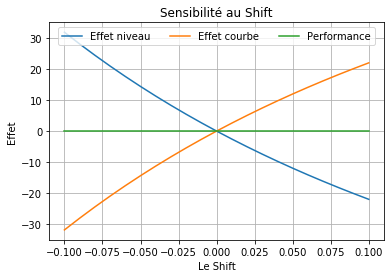

In [64]:
x = np.array(data3['Shift'])
a = data3['Effet niveau']
b = data3['Effet courbe']
c = data3['Performance']


plt.subplot()
plt.plot(x,a)
plt.plot(x,b)    
plt.plot(x,c)


plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), fancybox=True, ncol=5, labels=[ 'Effet niveau','Effet courbe',
                                                                                       'Performance'])
plt.title('Sensibilité au Shift')  # Ajout d'un titre
plt.xlabel('Le Shift')         # Nom de la grandeur en abscisse
plt.ylabel('Effet')         # Nom de la grandeur en ordonnée
plt.grid()              # Ajout d'une grille
plt.show()              # Affichage
#plt.legend()